# Booking.com Data Job Analysis
***
<p align="center">
<img src="Images/booking_logo.jpg" style>
</p>

### Introduction
_Passing by the Booking.com offices aboard a ferry on my daily commute I wondered, **what would it take to work for one of the world's biggest travel companies?**_

*I got inspired by their story - growing from a small Dutch startup in 1996 to leading digital travel company, and decided to talk to some of their employees. Throughout these talks it became apparent that their strong focus on creating an environment for learning and experimenting stood at the foundation of creating innovative solutions and value for its customers. These values resonated with me, and helped fuel this experiment.*

*Coming from a background in Architecture I've always had a strong interest in translating questions into insights, taking the conceptual and turning it into reality. But what transferable skills do I have?
Seeking out job requirements on the Booking.com career platform it soon became apperent that my passion for data, optimalization, python would be of use. Great, let's apply! Resume and covering letter at the ready, I stumble accross their hiring process:*

<p align="center">
<img src="Images/booking_ai.jpg" style>
</p>

*No cover letter, no person reading resumes, no applying to specific positions. Instead:*

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

_This sentence sparked my interest and started this project. **What if I could use a data-driven approach to tailor my resume to the positions I'm interested in?**_
***

### Project Objective

To create a clear outline and direction we start with our defining our goal for this project.

**Research Question: What skills and experiences are most relevant for Data-related positions at Booking.com?**

Key questions:
- How many data-related positions are available?
- What positions are available how are they segmented?
- What impact does location have on availibilty and type of job?
- What skills, education, experiences are most coveted by Booking.com?



### Methodology
- Reading in raw data from web scraper
- Cleaning up data / string manipulation
- Exploratory Analysis to understand data
- Delving into specifics to answer key questions

* In order to create a concise overview of the relevant data, I will opt for creating topic specific dataframes
***

# Imports

In [1]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.options.display.max_colwidth = 200
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#String manipulations
import re, string
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
#Un-comment line below to download WordNet for Lemmatizer
#nltk.download()

#Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import seaborn as sns
import itertools

#Plot output
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'

#Booking.com colorscheme RGBA
blue_d = np.array([0/256, 53/256, 128/256, 1])
blue_l = np.array([0/256, 159/256, 227/256, 1])
yellow = np.array([254/256, 186/256, 2/256, 1])
grey = np.array([102/256, 102/256, 102/256, 1])
white = np.array([242/256, 246/256, 250/256, 1])

#Booking.com colormaps (RGBA)
camp1 = ListedColormap([blue_d])
cmap2 = ListedColormap([blue_d,blue_l])
cmap3 = ListedColormap([blue_d,blue_l,yellow])
cmap4 = ListedColormap([blue_d,blue_l,yellow,grey])
cmap5 = ListedColormap([blue_d,blue_l,yellow,grey,white])

#Booking.com palletes (Hex)
c1 = ['#003580']
c2 = ['#003580', '#009fe3']
c3 = ['#003580', '#009fe3', '#feba02']
c4 = ['#003580', '#009fe3', '#feba02', '#666']
c5 = ['#003580', '#009fe3', '#feba02', '#666', '#f2f6fa']

#Booking.com settings Seaborn
#sns.set_style('whitegrid')
sns.set(rc={'axes.facecolor':'#f2f6fa', 'figure.facecolor':'#f2f6fa'})
sns.set_palette(sns.color_palette(c3))

#Wordcloud
from wordcloud import WordCloud

#Quality of life
from IPython.display import display
pd.set_option('colheader_justify', 'left')
pd.options.display.float_format = '{:,.2f}'.format
%precision %.2f

import warnings
warnings.filterwarnings('ignore')

# Data

The raw data received from the web scraper requires a bit of tidying up. Apart from the Job Title the dataframe consists mainly of long strings that needs to be made legible within the scope of this project.

In [2]:
df = pd.read_csv('Booking_Jobs.csv')

In [3]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (108, 2)


Job Title                                                            \
0                                                       Data Engineer   
1                      Manager Data Science Insights - Content Agency   
2  Senior Data Engineering Manager - Data & Machine Learning Platform   
3             Senior Data Engineer - Data & Machine Learning Platform   
4                                       Data Analyst Trip Foundations   

  Job Description                                                                                                                                                                                           
0  Data Engineer (Data Enablement) \n  About the company\nNot long ago, booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copac...  
1  At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We’re the thrill of the first...  
2  It wasn’t so long  ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few ...  
3  Booking.com is proud to be an equal opportunity workplace and is an affirmative action employer. All qualified applicants will receive consideration for employment without regard to race, colour, ...  
4  It wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few t...

In [4]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        108 non-null    object
 1   Job Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [5]:
job_listings = df['Job Title'].count()
job_listings

108

# String Manipulation

We'll start by adding all data-related job descriptions together to find the most commonly used words on the Booking.com career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees. To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

But firstly, we have to define a list of **stopwords**. These are words that often appear in sentences, but offer little value in understanding its meaning. We can use this list of omit stopwords, leaving us with the key words we're after.

The process will look as follows:
>1. Defining stopwords
>2. Combining all job descriptions
>3. Cleaning our string
>4. Transforming string into a dictionary of counted words 
>5. Ranking our words
>6. Filtering out stopwords
>7. Creating a dataframe

We get a lot of help from the NLTK - a Natural Language Processing Toolkit which offers various libraries for intepreting human language by computers. Specifically, we use the Enlgish Stopwords library and WordNet for Lemmatization (the reduction of words to their root word, i.e. walks/walking/walked turn to walk) without which we would have had a lot more work on our hands. Lemmatiation allows for a more accurate assessment of word similarity since it takes plurals and tense our of the equation.
***
If you're interested in the amazing work of NLTK, please consider checking out https://www.nltk.org/

### Step 1. Defining Stopwords

In [6]:
stopwords = sorted(stopwords.words('english')) #Using the Natural Language Toolkit (NLTK) library
stopwords_booking = ['booking','com', 'booking.com', 'bookingcom', 'part', 'right', 'make', 'work', 'working', #Adding platform specific words
                     'need', 'e','g', 'eg', '&','within', 'well', '-', '.', 'including', 'high', 'role', 'relevant', 'b',
                     'strong', 'key','one', 'year', 'years', 'looking', 'everyone', 'easier', 'sexual', 'we\'re', 'etc',
                     'orientation','best', 'company', 'application', 'equal', 'opportunity', 'national', 'world'
                     'origin', 'across', 'able', 'genetic', 'disability', 'new', 'gender', 'identity', 'level']
stopwords.extend(stopwords_booking) #Combining both into a stopwords list

### Step 2. Combining all Job Descriptions

In [7]:
descriptions = ''.join(d for d in df['Job Description']) #looping over all cells in Job Description column and joining then together
print ("There are {} words in the combined data-related job descriptions.".format(len(descriptions))) #Printing results

There are 549164 words in the combined data-related job descriptions.


### Step 3. Cleaning string (Lemmatization)

In [8]:
wordnetmatizer = WordNetLemmatizer() #Creating Lemmatizer object

sentence_words = nltk.word_tokenize(descriptions) #Tokenize descriptions from Step 2
descriptions = ' '.join([wordnetmatizer.lemmatize(words) for words in sentence_words]) #Lemmatize all words in tokenized sentence

In [9]:
descriptions = descriptions.lower() #Lowering string to remove capitalization and make comparing words possible
descriptions = re.sub('\W+',' ', descriptions) #Replace all puntualtion with a space - creating a (mostly) clean list of words

print ("There are {} words in the description.".format(len(descriptions))) #Printing results

There are 529124 words in the description.


### Step 4. Transforming string into a dictionary of counted words

In [10]:
word_count = dict(Counter(descriptions.split())) #Creating a dictionary of all words in split description
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'data': 781, 'engineer': 33, 'enablement': 6, 'about': 87, 'the': 2960, 'company': 174, 'not': 54, 'long': 77, 'ago': 28, 'booking': 654}


### Step 5. Ranking our words

In [11]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Creating dictionary by most popular words by looping over our split descriptions dictionary
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'and': 4873, 'the': 2960, 'to': 2781, 'of': 2044, 'a': 1778, 'in': 1328, 'with': 1035, 'for': 958, 'data': 781, 'team': 710}


### Step 6.  Filtering out stopwords

In [12]:
words_nonstop = [w for w in words_popular if w not in stopwords] #Creating dictionary of only stopword-excluded words to compare to
words_popular_nonstop = {k: words_popular[k] for k in words_nonstop if k in words_popular} #Looping over our stopword-excluded dictionary and comparing with ranked dictionary to extract word and frequency
print('The top 10 most frequently used words with stopwords looks like: {}'.format(dict(itertools.islice(words_popular_nonstop.items(), 10))))

The top 10 most frequently used words with stopwords looks like: {'data': 781, 'team': 710, 'experience': 709, 'product': 597, 'business': 530, 'world': 300, 'learning': 280, 'technology': 269, 'machine': 262, 'development': 256}


### Step 7. Creating DataFrame

In [13]:
words_all_jobs = pd.DataFrame.from_dict(words_popular_nonstop, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs

index        Count
0           data  781  
1           team  710  
2     experience  709  
3        product  597  
4       business  530  
...          ...    ...
3459  attractive    1  
3460      parter    1  
3461   expansion    1  
3462        cold    1  
3463     calling    1  

[3464 rows x 2 columns]

# Exploratory Analysis

One way to make this intuitively insightful is to use a wordcloud, which displays the most common words in a visual manner. The size of each word corresponds to the frequency of its use.

In [14]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular_nonstop) #Generate wordcloud class from dictionary

In [15]:
plt.imshow(wordcloud.recolor(colormap=cmap3), interpolation='bilinear')
plt.axis("off")
plt.show();

### Wordcloud - what did we learn?

Having included ALL data-related jobs, we can only spot general trends - our findings match that match of a(ny) data-driven company.

A few words pop out immediately (Data, Experience, Business, Team, Product), so it's worth paying closer attention to the 'secondary' words as well.

- **(Machine) Learning**: A general machine learning trend?
    - Treating these as seperate words loses out on possible overlap and will require further research
    - Correlation? Machine is often found in combination with Intelligence, Learning often turns up before Models and Code.
    - Overall, 'Machine' hints at strong ML-focus since it's a word rarely used outside of this context (in job positions).
    - Representation - How many jobs are ML-related and how much does this skew our vision of general Booking.com jobs descriptions?


- **World**: as one of the world’s leading digital travel companies this emphasizes their global presence and state of mind.

- **Empowerment**: we see a high frequency of words aligning with Booking.com values like: Vision, Development, Identify, Impact, and Ownership.

### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 20 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

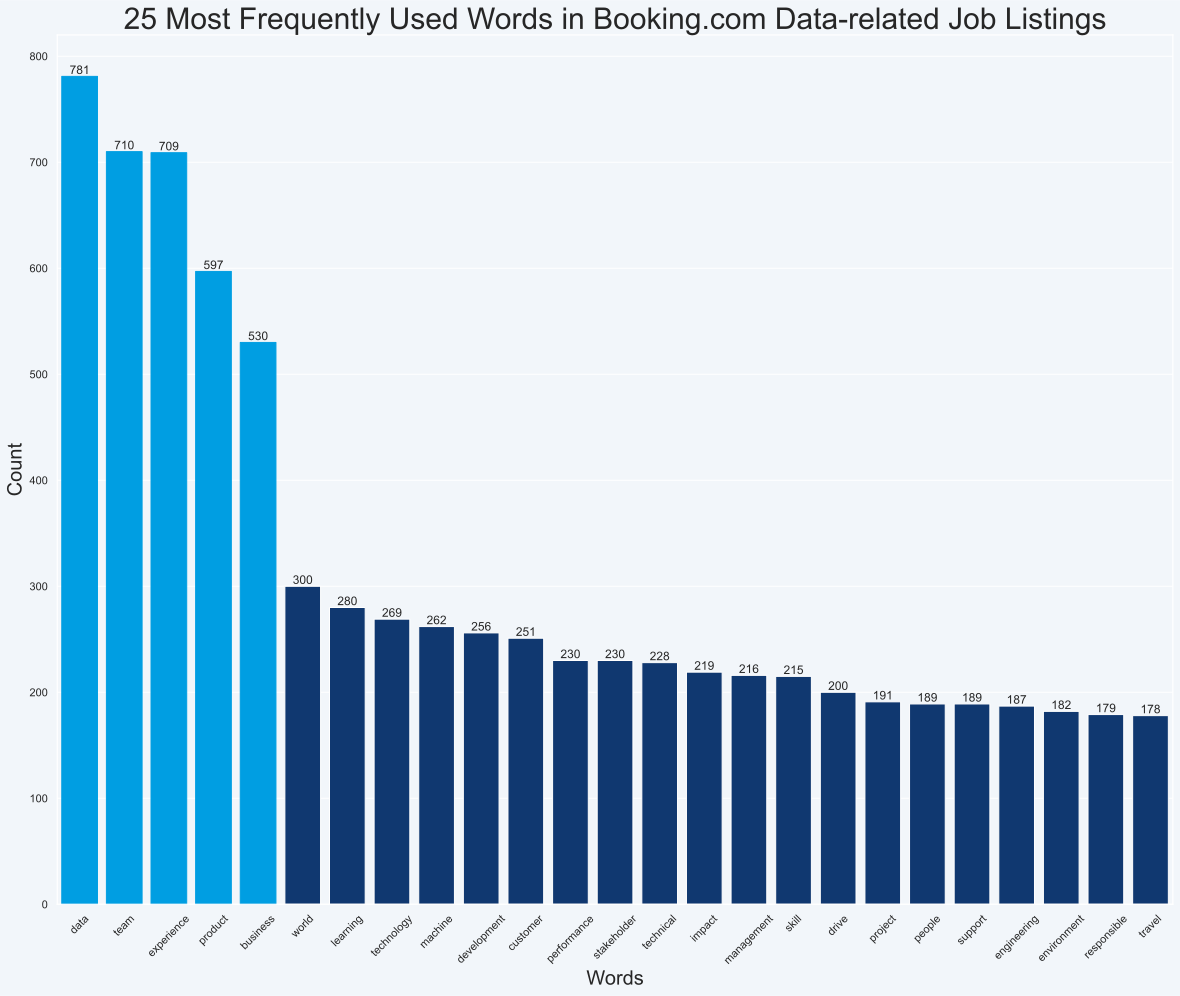

In [16]:
ax = sns.barplot(data=words_all_jobs[:25],x='index',y='Count',palette=c1)

for bar in ax.patches:
    if bar.get_x() < 4:
        bar.set_color(blue_l)    

ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('25 Most Frequently Used Words in Booking.com Data-related Job Listings', fontsize=30);

**Q:** How big a percentage of all words used is a Top 5 Word?

In [17]:
print('A: {}'.format(words_all_jobs['Count'][5:].sum()/words_all_jobs['Count'][:5].sum()))

A: 12.792906522392546


Let's calculate the ratio of each of these words per job listing.

In [18]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/job_listings #Creating new column for ratios
words_all_jobs

index        Count  Ratio_Listings
0           data  781   7.23           
1           team  710   6.57           
2     experience  709   6.56           
3        product  597   5.53           
4       business  530   4.91           
...          ...    ...             ...
3459  attractive    1   0.01           
3460      parter    1   0.01           
3461   expansion    1   0.01           
3462        cold    1   0.01           
3463     calling    1   0.01           

[3464 rows x 3 columns]

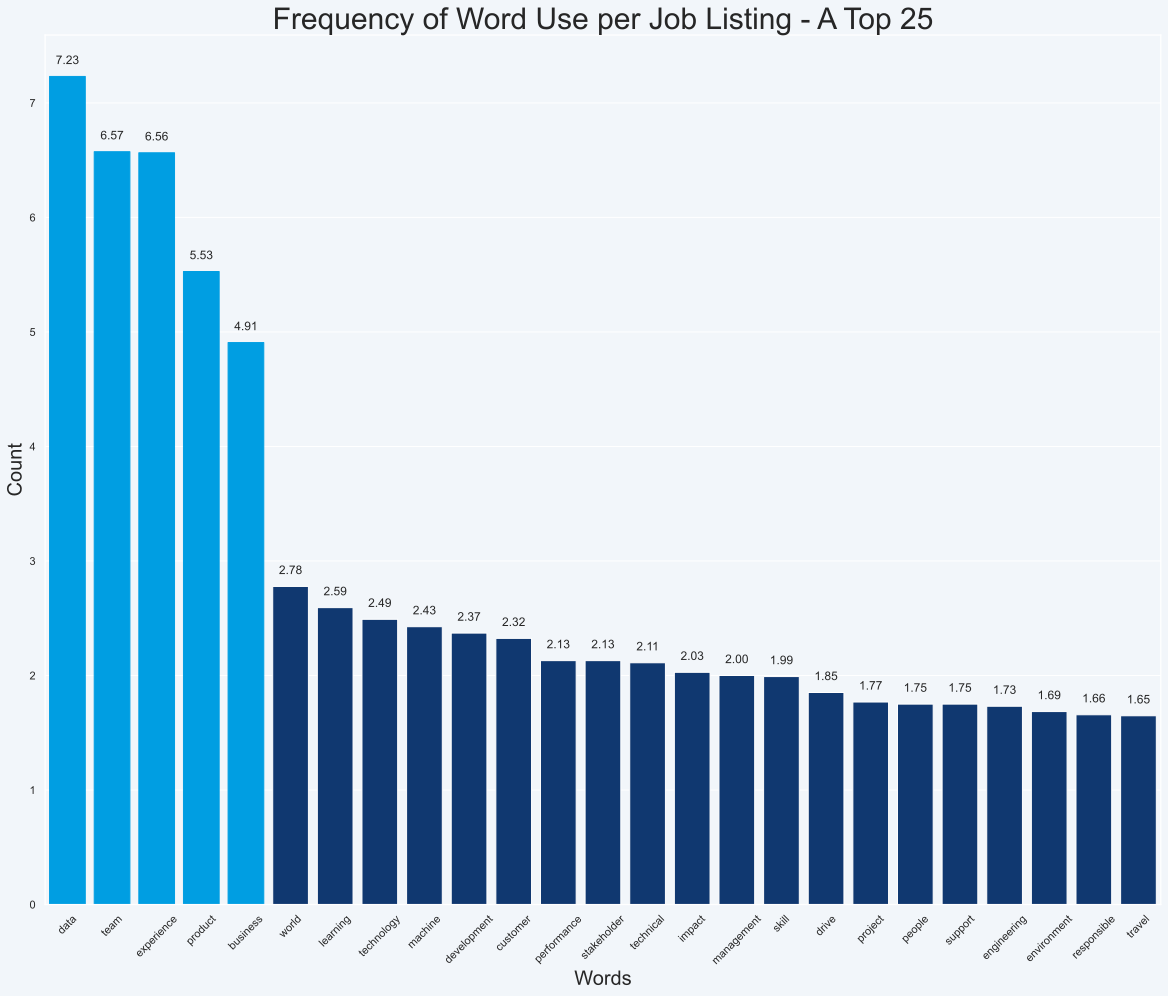

In [19]:
ax = sns.barplot(data=words_all_jobs[:25],x='index',y='Ratio_Listings', palette=c1)

for bar in ax.patches:
    if bar.get_x() < 4:
        bar.set_color(blue_l)    

ax.bar_label(ax.containers[0],fmt='%.2f',padding= 10)
plt.xticks(rotation= 45)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Frequency of Word Use per Job Listing - A Top 25', fontsize=30);

In [20]:
words_all_jobs['Ratio_Listings'][0]/words_all_jobs['Ratio_Listings'][5] #Ratio DATA to WORLD

2.6033333333333335

In [21]:
words_all_jobs['Ratio_Listings'][4]/words_all_jobs['Ratio_Listings'][5] #Ratio BUSINESS to WORLD

1.7666666666666668

###### Bar chart - what did we learn?

- Top 5 hegemony:
    - The differences between the 5 most used words and the rest is substatial, almost **13%** of all words* used is 'Data', 'Team', 'Experience', 'Product' or 'Business'
    - 'Data' is at least **2.6 times** more frequenty than words outside of the top 5
    - 'Business' is at least **1.7 times more** more likely to get used than any word outside the top 5
    - 'Data', 'Team' and 'Experience' are all used **over 6 times** per job listing
    
***    
\* _'all words' refers to the cleaned word list, excluding all stopwords. This means the percentages do not represent an absolute, but rather relative number._

## Job Titles

Now let's focus on the Job Titles to further out understanding of roles within Booking.com.

Create a new Dataframe with Job Titles as index. This way, we can locate job descriptions based on job titles.

In [22]:
df['Job Title'].nunique()==df['Job Title'].count()

True

The number of unique Job Titles and number of Job Titles is the same, meaning that we have to try a bit harder if we want to apply categorization.

In [23]:
df['Job Title'].sample(25) #Get sample of Job Titles

64                             Senior Software Developer - Core Infrastructure
50                              Machine Learning Engineering Manager - Ranking
11                                        Data Product Manager, Marketing Data
87                                                    Regional Finance Manager
56    Machine Learning Engineer - Web Core ML Personalisation - Accommodations
57                                                Workday Reporting Specialist
29                                                Business Insights Specialist
30                                  Senior Machine Learning Scientist - Safety
7                                      Data Scientist Insights - App Marketing
66                         Manager, Strategy & Operations - Horizontal Product
54                                                Director of Engineering DMLP
36                                                              SEO Strategist
33                                                  

In order to sort Job Descriptions by similarity we can use Job Titles to categorize them. Thankfully, the Booking.com Career platform have a handy set of teams it uses to sort by.

<p align="center">
<img src="Images/booking_teams.jpg" style>
</p>

Job positions generally do not fall exclusively in one category, so there will be a lot of overlap. Sorting a Job Title like 'Data Analyst' in the 'Data Science & Analytics' seems intuitive, but where does 'Senior Data Engineer - Data & Machine Learning Platform' fall? In order to categorize, we have to generalize.

#### Initial observations:
- Looking at the list above, we can see a lot of jobs have a location after the title, for the purposes of this analysis it can safely be ignored.
- To reduce overlap and create more distinct categories we opt to make a 'Legal' seperate entry and remove 'Public Affairs'
- 'Leadership' is a role, rather than a team - and is exluded from the list.
- All Product related skills have been categorized into 'Product'.

In [24]:
skills_dict = {'Business Development & Support': ['Communication', 'Positioning', 'Business Development','Planning',
                                                'Customer Service', 'Reporting', 'Account Management',
                                                'Governance', 'Agile', 'Change Management', 'Compliance', 'Risk Assessment',
                                                'People Management', 'Innovation', 'Strategy', 'Service Delivery'
                                                ],
                                            
        'Customer Service': ['Customer Service', 'Training', 'Microsoft Office', 'Sales', 'Communication', 'Languages', 'Investments'],
         
        'Data Science & Analytics': ['Sql', 'Python', 'Data Analysis', 'Tableau', 'Data Science', 'R', 'Visualization', 'Insights', 
                                    'Artificial Intelligence', 'Analytics', 'Hadoop', 'Spark', 'Statistics', 'Implementation', 
                                    'Data Management', 'Dashboards', 'Machine Learning', 'Graphite'
                                    ],
        
        'Design & User Experience':['Testing', 'Agile', 'Design Process', 'Mentoring', 'Six Sigma', 
                                    'Saas', 'Prototyping', 'Css', 'Html', 'Copywriting', 'User Flows', 
                                    'Adobe', 'Research', 'Invision', 'Ios', 'Android', 'User Experience'
                                    ],
        
        'Engineering': ['Engineering', 'Agile', 'Devops', 'Kubernetes', 'Java', 'Programming', 'Software Development',
                        'Cloud', 'Spring', 'Documentation', 'Soa', 'Technical Leadership', 'Jenkins', 'Ci/cd'  
                        ],
        
        'Finance': ['Finance', 'Operations', 'Sap', 'Budget', 'Compliance', 'General Ledger', 'Financial Planning', 
                    'Consolidation', 'Financial Analysis', 'Variance Analysis', 'Reporting', 'Audit', 'Data Entry', 
                    'Bookkeeping', 'Word'
                    ],
        
        'Legal': ['Negotiation', 'Accounts Receivable', 'Invoicing', 'Litigation', 'Internal Audit', 'Investigation',      
                'Drafting', 'Compliance', 'Regulatory', 'Legal Research', 'Legal Writing', 'Reviewing Contracts', 
                'Commercial Law', 'Financial Crime', 'Bribery', 'Ofac', 'Aml', 'Governance', 'Intellectual Property'
                ],
        
        'IT Services': ['Active Directory', 'Technical Support', 'Troubleshooting', 'Python', 'Configuration', 
                        'Testing', 'Logging', 'Vpn', 'Itil', 'Deployment', 'Maintenance', 
                        'Wireless', 'Security', 'Installation', 'Wan'
                        ],
                
        'Marketing & Communications': ['Social Media', 'Marketing', 'E-commerce', 'Media Engagement', 
                                    'Branding', 'Content Management', 'Editing', 'Crm', 'Campaign', 
                                    'Segmentation', 'Positioning'
                                    ],
        
        'People': ['Employee Relations', 'Talent Acquisition', 'Performance Management', 'Stakeholder Management', 
                    'Onboarding', 'Talent Management', 'Organizational Development', 'Workday', 'Administration', 
                    'Hr Process', 'Hr Operations', 'Hris', 'Hr', 'Relationship Management'
                    ],
        
        'Product': ['Product Management', 'Product Design', 'Project Management', 'Product Development', 
                    'Api', 'Product Lifecycle', 'Product Delivery', 'Product Strategy'            
                    ],
        
        'Security & Infrastructure': ['Linux', 'Networking', 'Security', 'Ansible', 'Cloud Computing', 'Automation', 
                                    'Infrastructure', 'Architecture', 'Docker', 'Distributed Systems', 'Mysql', 
                                    'Terraform', 'Openstack', 'Perl'
                                    ]
        }

In [25]:
df_clean = df.copy()

In [26]:
for i in range(df_clean.shape[0]):
    description = str(df_clean['Job Description'].iloc[i]).lower() #Create string of lower words from Job Title column at Index of Job Title
    description = re.sub('\\\\n',' ', description) #Replace all newlines - creating a (mostly) clean list of words
    description = re.sub('\W+',' ', description) #Replace all puntualtion with a space - creating a (mostly) clean list of words
    df_clean.iloc[i, df_clean.columns.get_loc('Job Description')] = description

In [27]:
df_clean.head(2)

Job Title                                        \
0                                   Data Engineer   
1  Manager Data Science Insights - Content Agency   

  Job Description                                                                                                                                                                                           
0  data engineer data enablement about the company not long ago booking a trip to see the eiffel tower stroll down new york s iconic madison avenue or feel the sand between our toes on copacabana bea...  
1  at booking com data drives our decisions technology is at our core and innovation is everywhere but our company is more than datasets lines of code or a b tests we re the thrill of the first night...

# Proper syntax, clean up code, comment and markup

In [28]:
def skillFinder(team):
    df_clean[team] = 0 #Settings initial value to 0
    skills = skills_dict[team] #Set skills to matching skill-set (values) of dictionary
    skills = [x.lower() for x in skills] #Lower strings in skills list
   

    for i in range(df_clean.shape[0]):
        description = df_clean['Job Description'][i]
        for j in range(len(skills)):
            if str(skills[j]) in description:
                df_clean[team][i] += 1

    return df_clean
    

for key, value in skills_dict.items():
    skillFinder(key)

df_clean


Job Title                                                            \
0                                                         Data Engineer   
1                        Manager Data Science Insights - Content Agency   
2    Senior Data Engineering Manager - Data & Machine Learning Platform   
3               Senior Data Engineer - Data & Machine Learning Platform   
4                                         Data Analyst Trip Foundations   
..                                                                  ...   
103                                                  Payroll Specialist   
104                      Account Manager - Bratislava (Maternity Cover)   
105                                          Account Manager - Brisbane   
106                                            Account Manager - Sydney   
107               Account Manager - Sydney (1 Year Fixed Term Contract)   

    Job Description                                                                                                                                                                                           \
0    data engineer data enablement about the company not long ago booking a trip to see the eiffel tower stroll down new york s iconic madison avenue or feel the sand between our toes on copacabana bea...   
1    at booking com data drives our decisions technology is at our core and innovation is everywhere but our company is more than datasets lines of code or a b tests we re the thrill of the first night...   
2    it wasn t so long ago that booking a trip to see the eiffel tower stroll down new york s iconic madison avenue or feel the sand between our toes on copacabana beach was simply a matter of a few ta...   
3    booking com is proud to be an equal opportunity workplace and is an affirmative action employer all qualified applicants will receive consideration for employment without regard to race colour rel...   
4    it wasn t so long ago that booking a trip to see the eiffel tower stroll down new york s iconic madison avenue or feel the sand between our toes on copacabana beach was simply a matter of a few ta...   
..                                                                                                                                                                                                       ...   
103  we offer a dynamic motivating and sophisticated work environment a culture that is open innovative and performance orientated our scale and scope commitment to people and high standards of integri...   
104  do you enjoy taking ownership and being responsible for your own internal business portfolio do you thrive in building strong relationships and inspiring partners about new products and services i...   
105  as an account manager you are responsible for hotel account management you support booking com bv by informing new hotels in a specific area in queensland with respect to the services offered by b...   
106  do you enjoy taking ownership and being responsible for your own internal business portfolio do you thrive in building strong relationships and inspiring partners about new products and services i...   
107  do you enjoy taking ownership and being responsible for your own internal business portfolio do you thrive in building strong relationships and inspiring partners about new products and services i...   

     Business Development & Support  Customer Service  \
0    5                               2                  
1    3                               1                  
2    3                               4                  
3    4                               3                  
4    3                               1                  
..                              ...               ...   
103  4                               2                  
104  2                               0                  
105  3                               2                  
106  2                              

# Add label of highest bars to chart - e.g. Data Analyst

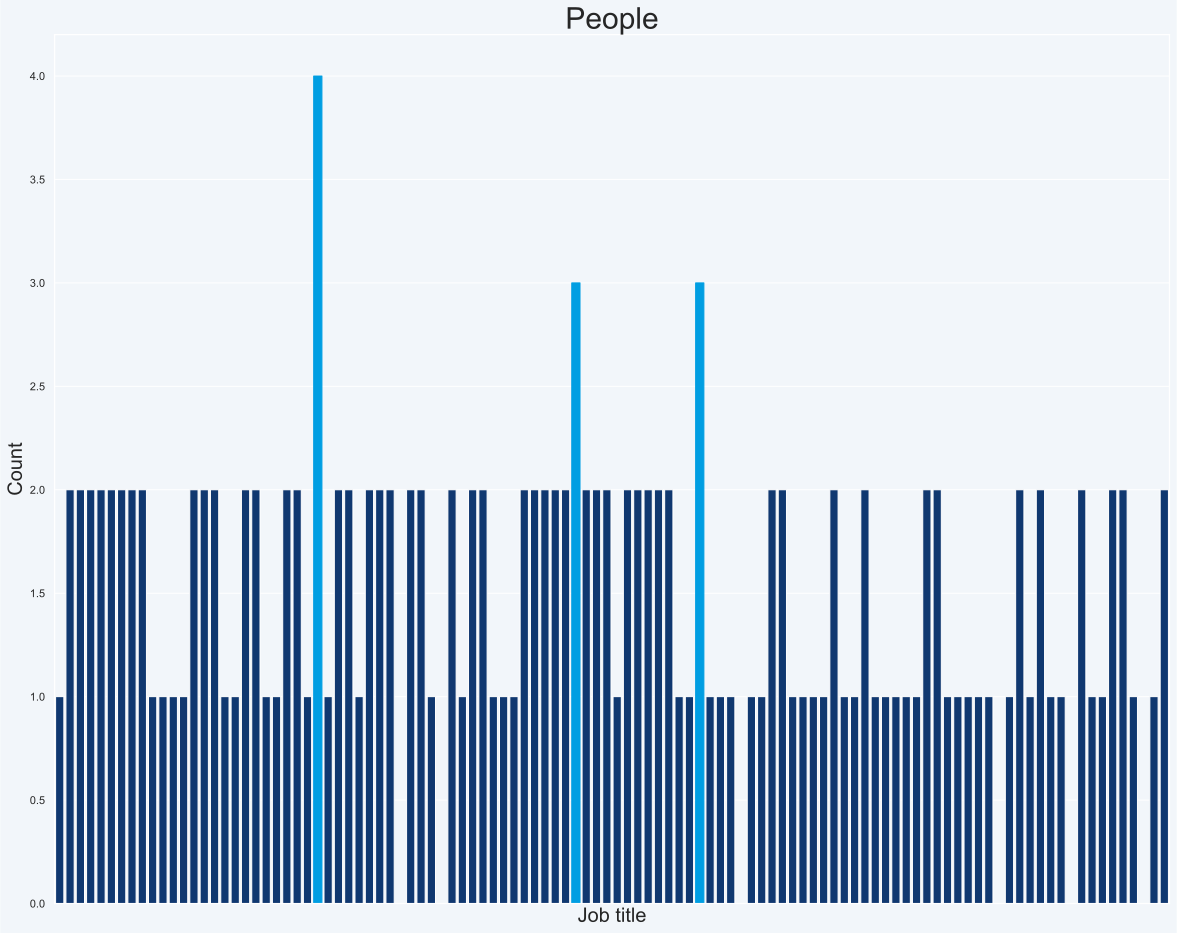

In [113]:
ax = sns.barplot(data=df_clean, x='Job Title', y='People', palette=c1)

for bar in ax.patches:
    if bar.get_height() > 2:
        bar.set_color(blue_l)    
        
ax.axes.xaxis.set_ticks([])
plt.xlabel('Job title', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('People', fontsize=30);

In [100]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharey=True)

for i, ax in zip(range(12), axes.flat):
    sns.barplot(data=df_clean, x='Job Title', y=skills_list[i], ax=ax);

# Style charts, sort out X labels - how can we mka ethis more insightful?

In [97]:
skills_list = list(skills_dict.keys())

In [39]:
for key, value in skills_dict.items():
    print(key)

Business Development & Support
Customer Service
Data Science & Analytics
Design & User Experience
Engineering
Finance
Legal
IT Services
Marketing & Communications
People
Product
Security & Infrastructure


### Function Extracting cleaned DF from Job Title

In order to compare the skills, experience and responsiblities between positions we create a function that does all the cleaning of text for us. This function is largely inherented from our previous cleaning efforts, but its structure allows us to iterate over all positions seperately.

With our previous analysis of all job descriptions we have created a baseline against which we can set our new findings.

In [ ]:
def wordRanker(job_title):
    description = str(df_titles.loc[job_title]).lower() #Create string of lower words from Job Title column at Index of Job Title
    description = re.sub('\\\\n',' ', description) #Replace all newlines - creating a (mostly) clean list of words
    description = re.sub('\W+',' ', description) #Replace all puntualtion with a space - creating a (mostly) clean list of words
    sentence_words = nltk.word_tokenize(description) #Tokenize descriptions from Step 2
    sentence_words = [x for x in sentence_words if len(x) > 3 if x != 'r'] #Dropping list items under 3 characters long that's not programming language R
    
    word_count = dict(Counter(sentence_words)) #Creating a dictionary of all words in split description
    words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Sorting dictionary by most popular words
    words_nonstop = [w for w in words_popular if w not in stopwords] #Drop all words that appear in both words_popular AND stopwords
    words_popular_nonstop = {k: words_popular[k] for k in words_nonstop if k in words_popular}
    words_all_jobs = pd.DataFrame.from_dict(words_popular_nonstop, orient='index',columns=['Count']).reset_index() #Create our cleaned dataframe
    return words_all_jobs

wordRanker('Senior Machine Learning Scientist - Safety')